In [1]:
# This notebook is about crip and Dual-Energy CT.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from crip.io import imreadTiff
from crip.plot import window, windowFullRange, VMIN0_VMAX1
from crip.physics import Atten, brewPowderSolution
from crip.spec import deDecompRecon

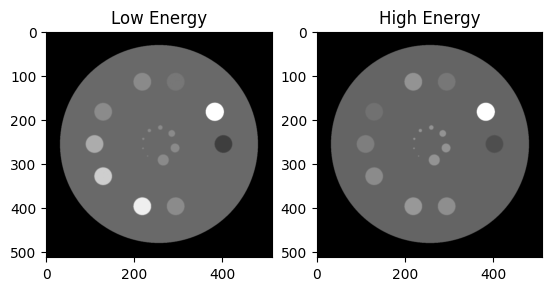

In [9]:
# Read Dual-Energy CT images and show.
low = imreadTiff('03-Low-Energy.tif') # mono-energetic @ 50keV
high = imreadTiff('03-High-Energy.tif') # mono-energetic @ 80keV
plt.figure()
plt.subplot(121); plt.imshow(window(low, (0.015, 0.024), style='wwwl', normalize='01'), cmap='gray', **VMIN0_VMAX1); plt.title('Low Energy')
plt.subplot(122); plt.imshow(window(high, (0.015, 0.020), style='wwwl', normalize='01'), cmap='gray', **VMIN0_VMAX1); plt.title('High Energy')
plt.show()

In [4]:
# Prepare two basis materials.
Water = Atten.fromBuiltIn('Water')
CaCl2 = Atten.fromBuiltIn('CaCl2')
CaCl2_100 = brewPowderSolution(CaCl2, Water, 100, 'mg/mL') # 100 mg/mL CaCl2 powder's water solution

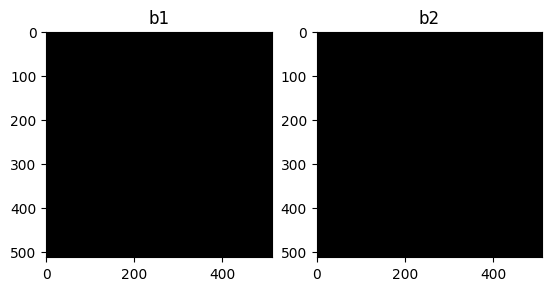

In [13]:
# Image-Domain Dual-Energy Two-Material Decomposition.
b1, b2 = deDecompRecon(low, high, (Water.mu[50], Water.mu[80]), (CaCl2_100.mu[50], CaCl2_100.mu[80]))
plt.figure()
plt.subplot(121); plt.imshow(windowFullRange(b1), cmap='gray', **VMIN0_VMAX1); plt.title('b1')
plt.subplot(122); plt.imshow(windowFullRange(b2), cmap='gray', **VMIN0_VMAX1); plt.title('b2')
plt.show()